# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
study_data_complete = pd.merge(study_results, mouse_metadata, how="left", on="Mouse ID")

# Display the data table for preview
study_data_complete.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
# Checking the number of mice.
len(study_data_complete["Mouse ID"].unique())

249

In [5]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mouse_ids = study_data_complete.loc[study_data_complete.duplicated(subset=['Mouse ID', 'Timepoint']), 'Mouse ID'].unique()
duplicate_mouse_ids[0]

'g989'

In [6]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mouse_data = study_data_complete.loc[study_data_complete["Mouse ID"] == duplicate_mouse_ids[0]]
duplicate_mouse_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [8]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_study_data_complete = study_data_complete[study_data_complete["Mouse ID"].isin(duplicate_mouse_ids)==False]
clean_study_data_complete.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [9]:
# Checking the number of mice in the clean DataFrame.
len(clean_study_data_complete["Mouse ID"].unique())

248

## Summary Statistics

In [11]:
means = clean_study_data_complete.groupby('Drug Regimen').mean()
means["Tumor Volume (mm3)"]

Drug Regimen
Capomulin    40.675741
Ceftamin     52.591172
Infubinol    52.884795
Ketapril     55.235638
Naftisol     54.331565
Placebo      54.033581
Propriva     52.320930
Ramicane     40.216745
Stelasyn     54.233149
Zoniferol    53.236507
Name: Tumor Volume (mm3), dtype: float64

In [12]:
medians = clean_study_data_complete.groupby('Drug Regimen').median()
medians["Tumor Volume (mm3)"]

Drug Regimen
Capomulin    41.557809
Ceftamin     51.776157
Infubinol    51.820584
Ketapril     53.698743
Naftisol     52.509285
Placebo      52.288934
Propriva     50.446266
Ramicane     40.673236
Stelasyn     52.431737
Zoniferol    51.818479
Name: Tumor Volume (mm3), dtype: float64

In [13]:
variances = clean_study_data_complete.groupby('Drug Regimen').var()
variances["Tumor Volume (mm3)"]

Drug Regimen
Capomulin    24.947764
Ceftamin     39.290177
Infubinol    43.128684
Ketapril     68.553577
Naftisol     66.173479
Placebo      61.168083
Propriva     43.852013
Ramicane     23.486704
Stelasyn     59.450562
Zoniferol    48.533355
Name: Tumor Volume (mm3), dtype: float64

In [14]:
stds = clean_study_data_complete.groupby('Drug Regimen').std()
stds["Tumor Volume (mm3)"]

Drug Regimen
Capomulin    4.994774
Ceftamin     6.268188
Infubinol    6.567243
Ketapril     8.279709
Naftisol     8.134708
Placebo      7.821003
Propriva     6.622085
Ramicane     4.846308
Stelasyn     7.710419
Zoniferol    6.966589
Name: Tumor Volume (mm3), dtype: float64

In [15]:
sems = clean_study_data_complete.groupby('Drug Regimen').sem()
sems["Tumor Volume (mm3)"]

Drug Regimen
Capomulin    0.329346
Ceftamin     0.469821
Infubinol    0.492236
Ketapril     0.603860
Naftisol     0.596466
Placebo      0.581331
Propriva     0.544332
Ramicane     0.320955
Stelasyn     0.573111
Zoniferol    0.516398
Name: Tumor Volume (mm3), dtype: float64

In [16]:
summaryDict = {
    "Mean Tumor Volume": means["Tumor Volume (mm3)"],
    "Median Tumor Volume": medians["Tumor Volume (mm3)"],
    "Tumor Volume Variance": variances["Tumor Volume (mm3)"],
    "Tumor Volume Std. Dev.": stds["Tumor Volume (mm3)"],
    "Tumor Volume Std. Err.": sems["Tumor Volume (mm3)"],
}

summaryDict

{'Mean Tumor Volume': Drug Regimen
 Capomulin    40.675741
 Ceftamin     52.591172
 Infubinol    52.884795
 Ketapril     55.235638
 Naftisol     54.331565
 Placebo      54.033581
 Propriva     52.320930
 Ramicane     40.216745
 Stelasyn     54.233149
 Zoniferol    53.236507
 Name: Tumor Volume (mm3), dtype: float64,
 'Median Tumor Volume': Drug Regimen
 Capomulin    41.557809
 Ceftamin     51.776157
 Infubinol    51.820584
 Ketapril     53.698743
 Naftisol     52.509285
 Placebo      52.288934
 Propriva     50.446266
 Ramicane     40.673236
 Stelasyn     52.431737
 Zoniferol    51.818479
 Name: Tumor Volume (mm3), dtype: float64,
 'Tumor Volume Variance': Drug Regimen
 Capomulin    24.947764
 Ceftamin     39.290177
 Infubinol    43.128684
 Ketapril     68.553577
 Naftisol     66.173479
 Placebo      61.168083
 Propriva     43.852013
 Ramicane     23.486704
 Stelasyn     59.450562
 Zoniferol    48.533355
 Name: Tumor Volume (mm3), dtype: float64,
 'Tumor Volume Std. Dev.': Drug Regimen


In [17]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

summaryTable = pd.DataFrame(summaryDict)

summaryTable

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [18]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line.
summaryTable2 = clean_study_data_complete.groupby("Drug Regimen").agg({"Tumor Volume (mm3)":["mean", "median", "var", "std", "sem"]})
summaryTable2

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

In [19]:
# generate the series for the drug regimens
counts = clean_study_data_complete["Drug Regimen"].value_counts()
counts

Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Stelasyn     181
Placebo      181
Infubinol    178
Ceftamin     178
Propriva     148
Name: Drug Regimen, dtype: int64

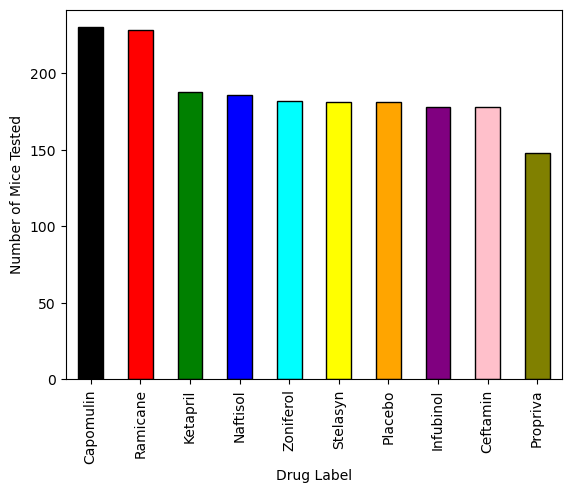

In [22]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
counts.plot(kind='bar', 
            color=['black', 'red', 'green', 'blue', 'cyan', "yellow", "orange", "purple", "pink", "olive", "brown"],
           edgecolor='black')

plt.xlabel("Drug Label")

plt.xticks(rotation=90)

plt.ylabel("Number of Mice Tested")

plt.show()

In [23]:
counts.index.values

array(['Capomulin', 'Ramicane', 'Ketapril', 'Naftisol', 'Zoniferol',
       'Stelasyn', 'Placebo', 'Infubinol', 'Ceftamin', 'Propriva'],
      dtype=object)

In [24]:
counts.values

array([230, 228, 188, 186, 182, 181, 181, 178, 178, 148], dtype=int64)

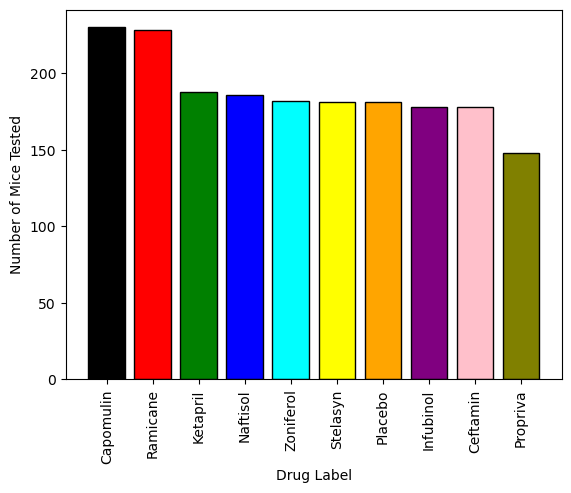

In [25]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
plt.bar(counts.index.values,
        counts.values,
        color=['black', 'red', 'green', 'blue', 'cyan', "yellow", "orange", "purple", "pink", "olive", "brown"],
        edgecolor='black')

plt.xlabel("Drug Label")

plt.xticks(rotation=90)

plt.ylabel("Number of Mice Tested")

plt.show()


In [27]:
# gender counts
counts = clean_study_data_complete["Sex"].value_counts()
counts

Male      958
Female    922
Name: Sex, dtype: int64

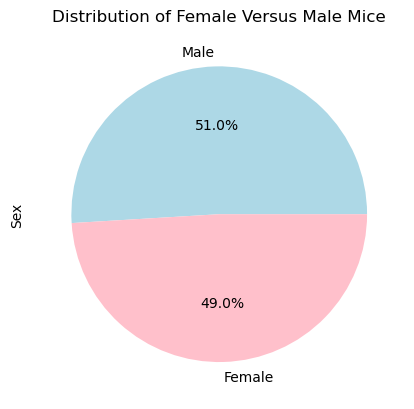

In [33]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
counts.plot(kind="pie", autopct='%1.1f%%', colors=["lightblue", "pink"])
plt.title("Distribution of Female Versus Male Mice")
plt.show()

In [30]:
counts.index.values

array(['Male', 'Female'], dtype=object)

In [31]:
counts.values

array([958, 922], dtype=int64)

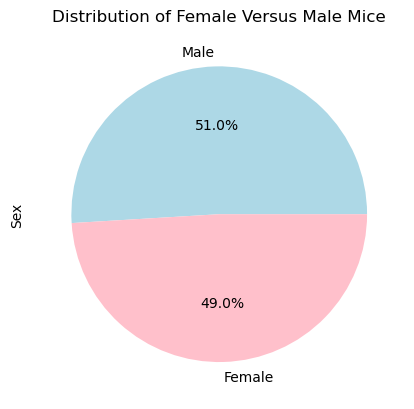

In [34]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(counts.values, labels=counts.index.values, autopct='%1.1f%%', colors=["lightblue", "pink"])
plt.ylabel("Sex")
plt.title("Distribution of Female Versus Male Mice")
plt.show()

## Quartiles, Outliers and Boxplots

In [36]:
max_tumor = clean_study_data_complete.groupby("Mouse ID")["Timepoint"].max() # creates a series
max_tumor = max_tumor.reset_index() # resets the index to make a dataframe with Mouse ID and Time point
max_tumor

,Mouse ID,Timepoint
0,a203,45
1,a251,45
2,a262,45
3,a275,45
4,a366,30
...,...,...
243,z435,10
244,z578,45
245,z581,45
246,z795,45


In [37]:
clean_study_data_complete.head() # show dataframe and then join based on the mouse ID and timepoint to get the final time points

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [38]:
merged_data = max_tumor.merge(clean_study_data_complete, on=["Mouse ID", "Timepoint"], how="left")
merged_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29


In [39]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merged_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29


In [40]:
# Put treatments into a list for for loop (and later for plot labels)
treatment_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

In [41]:
# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_list = []

In [44]:
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
# (Use a for loop to loop through treatment list)
for treatment in treatment_list:
    # Locate the rows which contain mice on each drug and get the tumor volumes - use .loc()
    final_tumor_vol = merged_data.loc[merged_data["Drug Regimen"] == treatment]
    
final_tumor_vol.head(3) # prints Ceftamin results -> need to isolate to get the Tumor Volume Column

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
3,a275,45,62.999356,3,Ceftamin,Female,20,28
21,b447,0,45.000000,0,Ceftamin,Male,2,30
22,b487,25,56.057749,1,Ceftamin,Female,6,28


In [45]:
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
# (Use a for loop to loop through treatment list)
for treatment in treatment_list:
    # Locate the rows which contain mice on each drug and get the tumor volumes - use .loc()
    final_tumor_vol = merged_data.loc[merged_data["Drug Regimen"] == treatment, 'Tumor Volume (mm3)']
    
final_tumor_vol.head(3) # prints Ceftamin results -> isolated to get the Tumor Volume Column

3     62.999356
21    45.000000
22    56.057749
Name: Tumor Volume (mm3), dtype: float64

In [46]:
# reset the tumor_vol_list
tumor_vol_list = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
# (Use a for loop to loop through treatment list)
for treatment in treatment_list:
    # Locate the rows which contain mice on each drug and get the tumor volumes - use .loc()
    final_tumor_vol = merged_data.loc[merged_data["Drug Regimen"] == treatment, 'Tumor Volume (mm3)']
    
    # add to the empty tumor volume list
    tumor_vol_list.append(final_tumor_vol)

# print the tumor vol list
tumor_vol_list

[19     38.982878
 24     38.939633
 61     30.485985
 64     37.074024
 66     40.159220
 80     47.685963
 83     37.311846
 85     38.125164
 87     38.753265
 108    41.483008
 115    38.846876
 121    28.430964
 124    33.329098
 162    46.539206
 163    32.377357
 169    41.581521
 174    23.343598
 180    40.728578
 183    34.455298
 192    31.023923
 204    40.658124
 208    39.952347
 220    36.041047
 226    28.484033
 239    31.896238
 Name: Tumor Volume (mm3), dtype: float64,
 6      38.407618
 7      43.047543
 10     38.810366
 12     32.978522
 33     38.342008
 37     33.397653
 45     37.311236
 52     40.659006
 70     29.128472
 76     33.562402
 77     36.374510
 91     31.560470
 93     36.134852
 96     22.050126
 119    30.564625
 126    31.095335
 157    45.220869
 158    36.561652
 166    37.225650
 168    43.419381
 177    30.276232
 190    40.667713
 217    43.166373
 235    44.183451
 244    30.638696
 Name: Tumor Volume (mm3), dtype: float64,
 0      67.973

In [51]:
# reset the tumor_vol_list
tumor_vol_list = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
# (Use a for loop to loop through treatment list)
for treatment in treatment_list:
    # Locate the rows which contain mice on each drug and get the tumor volumes - use .loc()
    final_tumor_vol = merged_data.loc[merged_data["Drug Regimen"] == treatment, 'Tumor Volume (mm3)']
    
    # add to the empty tumor volume list
    tumor_vol_list.append(final_tumor_vol)
    
    # Determine outliers using upper and lower bounds
    quartiles = final_tumor_vol.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outliers = final_tumor_vol.loc[(final_tumor_vol < lower_bound) | (final_tumor_vol > upper_bound)]
    if len(outliers) == 0:
        print(f"{treatment}'s potential outliers: None")
    else:
        output = f"{treatment}'s potential outliers: "
        for o in outliers:
            output += f"{o}"
        print(output)

Capomulin's potential outliers: None
Ramicane's potential outliers: None
Infubinol's potential outliers: 36.3213458
Ceftamin's potential outliers: None


In [14]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


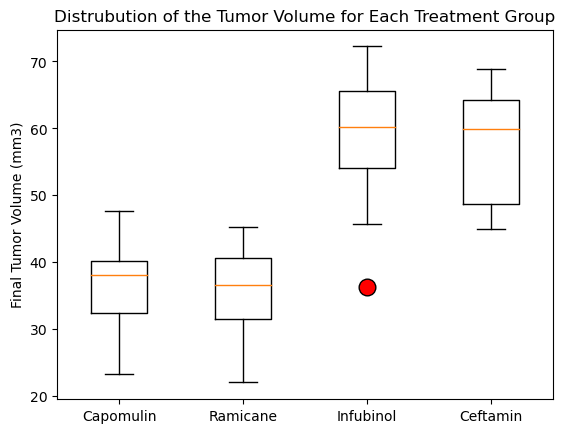

In [54]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group. (Default)
orange_out = dict(markerfacecolor='red',markersize=12)
plt.boxplot(tumor_vol_list, labels = treatment_list,flierprops=orange_out)
plt.ylabel('Final Tumor Volume (mm3)')
plt.title("Distrubution of the Tumor Volume for Each Treatment Group")
plt.show()

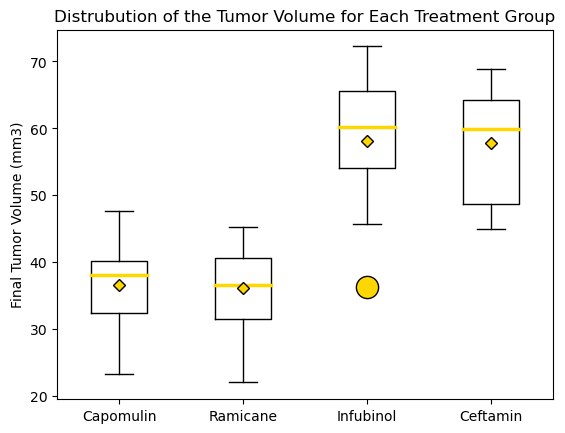

In [58]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group. (Full customized)
# customize the outliers
flierprops = dict(marker='o', markerfacecolor='gold', markersize=16,
                  markeredgecolor='black')
# customize the median line
medianprops = dict(linestyle='-', linewidth=2.5, color='gold')
# customize the the mean
meanpointprops = dict(marker='D', markeredgecolor='black',
                      markerfacecolor='gold')

plt.boxplot(tumor_vol_list, labels = treatment_list,flierprops=flierprops, medianprops=medianprops, meanprops=meanpointprops,
           showmeans=True)
plt.ylabel('Final Tumor Volume (mm3)')
plt.title("Distrubution of the Tumor Volume for Each Treatment Group")
plt.show()

## Line and Scatter Plots

In [60]:
capomulinTable = clean_study_data_complete.loc[clean_study_data_complete["Drug Regimen"] == "Capomulin"]
capomulinTable.head(3)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
226,j246,0,45.0,0,Capomulin,Female,21,21
227,r554,0,45.0,0,Capomulin,Female,8,17


In [61]:
l509Data = capomulinTable.loc[capomulinTable["Mouse ID"] == 'l509']
l509Data # we jst need the Timepoint (x) and Tumor Volume columns (y)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
231,l509,0,45.000000,0,Capomulin,Male,17,21
253,l509,5,45.851193,0,Capomulin,Male,17,21
539,l509,10,46.759074,0,Capomulin,Male,17,21
881,l509,15,47.488599,1,Capomulin,Male,17,21
982,l509,20,48.070452,2,Capomulin,Male,17,21
1146,l509,25,44.006257,2,Capomulin,Male,17,21
1414,l509,30,44.708055,2,Capomulin,Male,17,21
1499,l509,35,40.207288,2,Capomulin,Male,17,21
1723,l509,40,40.770813,2,Capomulin,Male,17,21
1771,l509,45,41.483008,3,Capomulin,Male,17,21


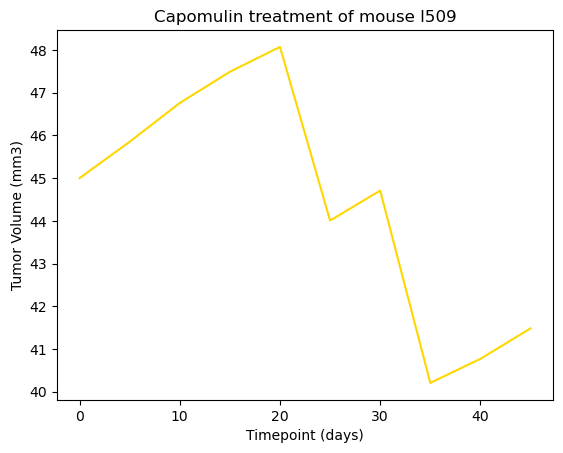

In [62]:
plt.plot(l509Data["Timepoint"], l509Data["Tumor Volume (mm3)"], color="gold")
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Capomulin treatment of mouse l509')
plt.show()

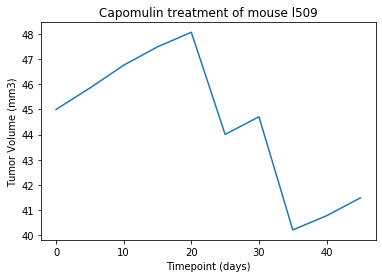

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin



In [63]:
# need to take averages for the weights and tumor volumes
capomulinAverages = capomulinTable.groupby(["Mouse ID"]).mean()
capomulinAverages.head(3) # only need the Weight (g) (X axis) and the Tumor Volume (Y axis)

,Timepoint,Tumor Volume (mm3),Metastatic Sites,Age_months,Weight (g)
Mouse ID,,,,,
b128,22.5,41.963636,0.7,9.0,22.0
b742,22.5,40.083699,0.0,7.0,21.0
f966,10.0,36.505973,0.0,16.0,17.0


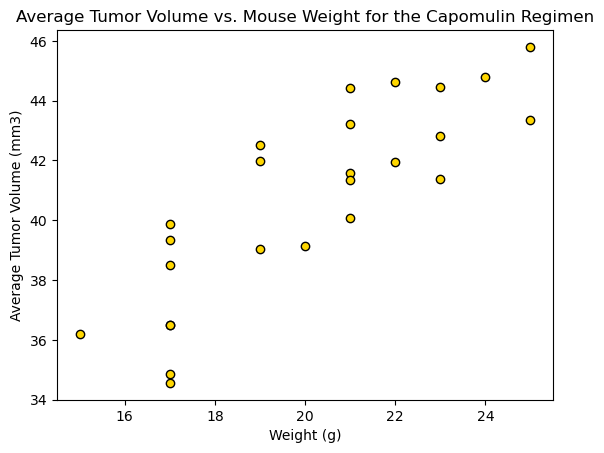

In [65]:
# use plt.scatter()
plt.scatter(capomulinAverages["Weight (g)"], capomulinAverages["Tumor Volume (mm3)"], facecolor="gold", edgecolor="black")
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title("Average Tumor Volume vs. Mouse Weight for the Capomulin Regimen")
plt.show()

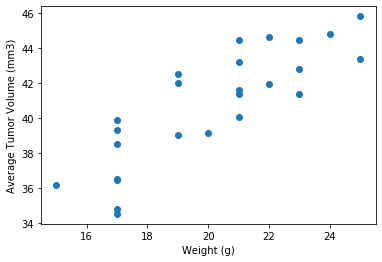

In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen



## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


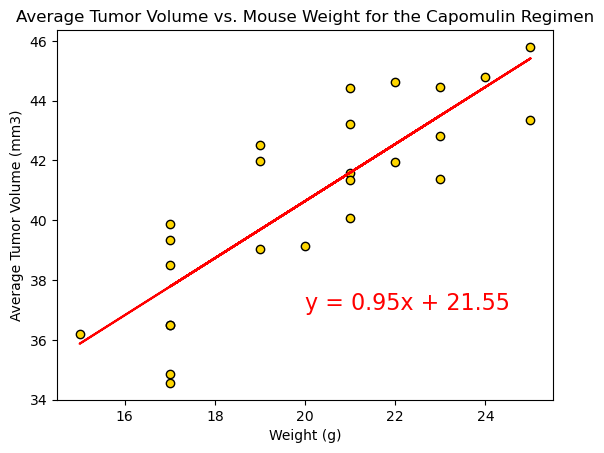

In [73]:
corr=round(st.pearsonr(capomulinAverages['Weight (g)'],capomulinAverages['Tumor Volume (mm3)'])[0],2)
print(f"The correlation between mouse weight and the average tumor volume is {corr}")

x_values = capomulinAverages["Weight (g)"]
y_values = capomulinAverages["Tumor Volume (mm3)"]

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(capomulinAverages['Weight (g)'], capomulinAverages['Tumor Volume (mm3)'])
regressValues = x_values * slope + intercept
lineEQ = f"y = {slope:.2f}x + {intercept:.2f}"

plt.scatter(x_values, y_values, facecolor="gold", edgecolor="black")

plt.plot(x_values, regressValues, "r-")
plt.annotate(lineEQ, (20, 37), fontsize=16, color="red")

plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title("Average Tumor Volume vs. Mouse Weight for the Capomulin Regimen")
plt.show()

The correlation between mouse weight and the average tumor volume is 0.84


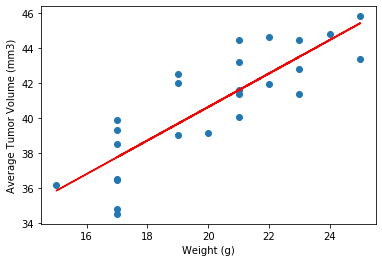

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

